In [12]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_squirrel = pd.read_csv('squirrel_diet.csv')

In [14]:
df_squirrel.head()

,sex,diet,weight
0,0,3,1.042
1,1,3,1.196
2,1,2,1.401
3,1,1,1.015
4,0,2,1.141


In [15]:
df_squirrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     100 non-null    int64  
 1   diet    100 non-null    int64  
 2   weight  100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [16]:
df_squirrel.describe()

,sex,diet,weight
count,100.000000,100.0000,100.000000
mean,0.480000,1.9600,1.126600
std,0.502117,0.8278,0.188248
min,0.000000,1.0000,0.681000
25%,0.000000,1.0000,1.000500
50%,0.000000,2.0000,1.077500
75%,1.000000,3.0000,1.213500
max,1.000000,3.0000,1.979000


In [17]:
fig =px.scatter(df_squirrel, x='diet', y='weight', color='sex')
fig.show()

In [18]:
df_squirrel['diet'].value_counts()

diet
1    36
3    32
2    32
Name: count, dtype: int64

Changing values in a column diet and sex to proper names according to picture.

In [19]:
df_squirrel['diet'] = df_squirrel['diet'].apply(lambda x: 'A' if x==1 else ('B' if x==2 else 'C'))

In [20]:
df_squirrel['sex'] = df_squirrel['sex'].apply(lambda x: 'Female' if x==0 else 'Male')

In [21]:
fig =px.scatter(df_squirrel, x='diet', y='weight', color='sex')
fig.update_layout(scattermode='group', scattergap=0.9)
fig.show()

After some researh i have not found any ways to make plot like we need in plotly.express. I would appreciate hint.

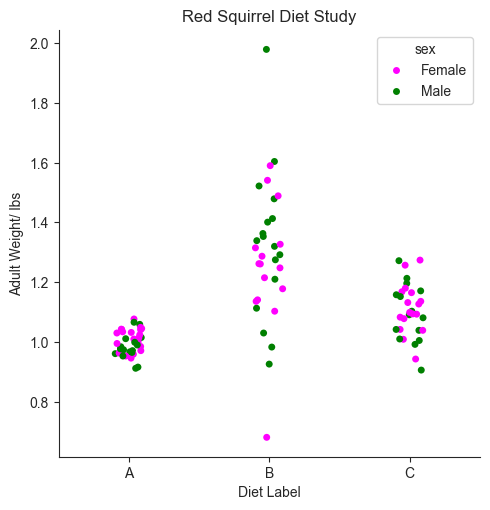

In [22]:
sns.set_style('ticks')
fig = sns.catplot(data=df_squirrel, x='diet', y='weight', hue='sex', order=['A', 'B', 'C'], palette={"Male": "green", "Female": "magenta"}, legend_out=False)
fig.set(
    xlabel='Diet Label',
    ylabel='Adult Weight/ lbs',
    title='Red Squirrel Diet Study'
)
plt.show()

I have found only way to remove top and right axes, but not to add :(

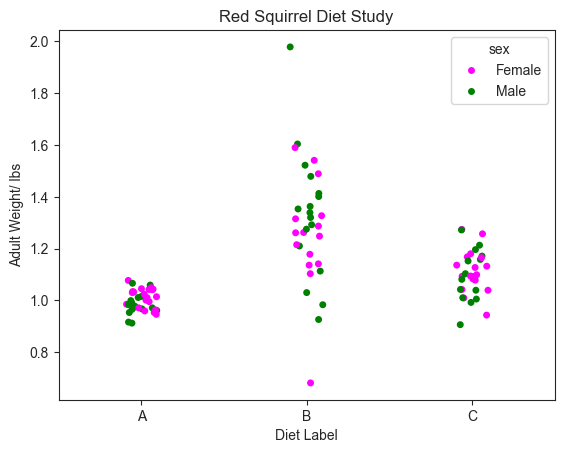

In [23]:
fig = sns.stripplot(x="diet", y="weight", data=df_squirrel, hue='sex', palette={"Male": "green", "Female": "magenta"}, order=['A', 'B', 'C'])
fig.set(
    xlabel='Diet Label',
    ylabel='Adult Weight/ lbs',
    title='Red Squirrel Diet Study'
)
plt.show()

Here is final plot, that looks simmilar to what we should get.

In [27]:
fig = px.box(df_squirrel, x='diet', y='weight', color='sex')
fig.show()